# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    response = requests.get(city_url)
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yinchuan
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | sadri
Processing Record 7 of Set 1 | la passe
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | guichon
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | aljezur
Processing Record 19 of Set 1 | vilyuchinsk
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | al bawiti
Processing Record 22 of Set 1 | petropavlovsk-kamchatsky
Processing Record 23 

Processing Record 38 of Set 4 | sonsorol village
City not found. Skipping...
Processing Record 39 of Set 4 | ivdel'
Processing Record 40 of Set 4 | north bend
Processing Record 41 of Set 4 | lerwick
Processing Record 42 of Set 4 | novodvinsk
Processing Record 43 of Set 4 | khandyga
Processing Record 44 of Set 4 | opuwo
Processing Record 45 of Set 4 | alotau
City not found. Skipping...
Processing Record 46 of Set 4 | afaahiti
Processing Record 47 of Set 4 | walvis bay
Processing Record 48 of Set 4 | hammerfest
Processing Record 49 of Set 4 | kenai
Processing Record 0 of Set 5 | mwinilunga
Processing Record 1 of Set 5 | cururupu
Processing Record 2 of Set 5 | tahla
Processing Record 3 of Set 5 | belyy yar
Processing Record 4 of Set 5 | badger
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | tazacorte
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | devinuwara
City not found. Skipping...
Processing Record

Processing Record 31 of Set 8 | kavieng
Processing Record 32 of Set 8 | gadzhiyevo
Processing Record 33 of Set 8 | rundu
Processing Record 34 of Set 8 | aginskoye
Processing Record 35 of Set 8 | az zubayr
Processing Record 36 of Set 8 | guarapari
Processing Record 37 of Set 8 | tapes
Processing Record 38 of Set 8 | kolonia town
Processing Record 39 of Set 8 | rojhan
Processing Record 40 of Set 8 | xining
Processing Record 41 of Set 8 | sungai raya
Processing Record 42 of Set 8 | tubarjal
Processing Record 43 of Set 8 | knysna
Processing Record 44 of Set 8 | kirakira
Processing Record 45 of Set 8 | norrtalje
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | olinda
Processing Record 48 of Set 8 | dhidhdhoo
Processing Record 49 of Set 8 | ocean shores
Processing Record 0 of Set 9 | manokwari
Processing Record 1 of Set 9 | ploudalmezeau
Processing Record 2 of Set 9 | port blair
Processing Record 3 of Set 9 | poli
Processing Record 4 of Set 9 | gunjur
Processing Recor

Processing Record 21 of Set 12 | pechory
Processing Record 22 of Set 12 | ayaguz
City not found. Skipping...
Processing Record 23 of Set 12 | livingston
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yinchuan,38.4681,106.2731,62.11,32,31,5.68,CN,1697534785
1,hermanus,-34.4187,19.2345,72.19,59,0,2.04,ZA,1697534786
2,bethel,41.3712,-73.4140,49.95,87,75,3.44,US,1697534493
3,waitangi,-43.9535,-176.5597,49.82,90,100,4.00,NZ,1697534789
4,grytviken,-54.2811,-36.5092,32.41,88,42,9.10,GS,1697534790


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yinchuan,38.4681,106.2731,62.11,32,31,5.68,CN,1697534785
1,hermanus,-34.4187,19.2345,72.19,59,0,2.04,ZA,1697534786
2,bethel,41.3712,-73.4140,49.95,87,75,3.44,US,1697534493
3,waitangi,-43.9535,-176.5597,49.82,90,100,4.00,NZ,1697534789
4,grytviken,-54.2811,-36.5092,32.41,88,42,9.10,GS,1697534790


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

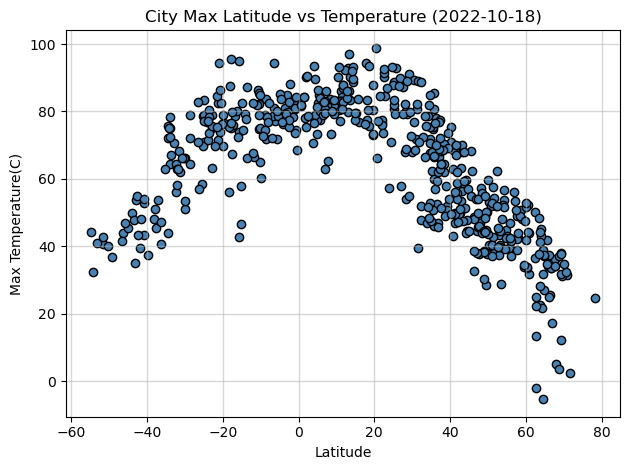

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

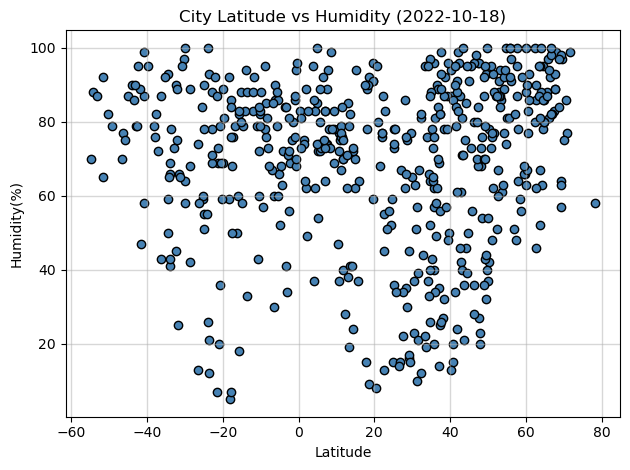

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

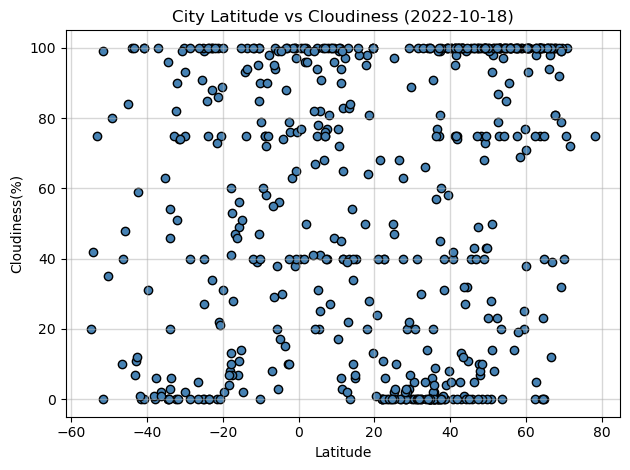

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

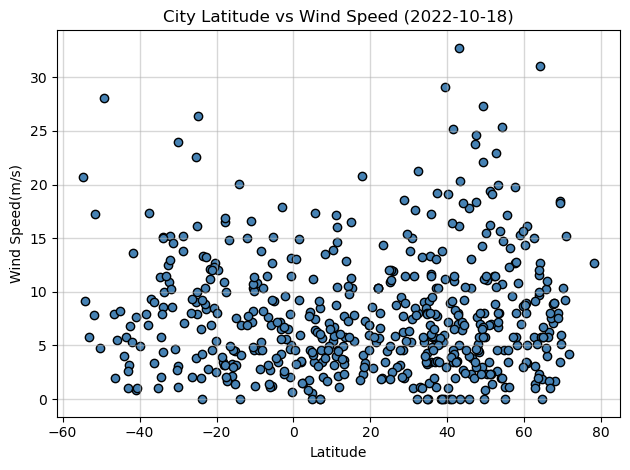

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    correlation = st.pearsonr(x,y) 
    print(f"The r-squared is : {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yinchuan,38.4681,106.2731,62.11,32,31,5.68,CN,1697534785
2,bethel,41.3712,-73.4140,49.95,87,75,3.44,US,1697534493
5,sadri,25.1833,73.4333,88.65,36,2,10.94,IN,1697534791
6,la passe,45.5549,-0.8967,68.23,73,100,17.85,FR,1697534792
8,lata,40.1629,-8.3327,70.92,87,100,19.08,PT,1697534794


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,72.19,59,0,2.04,ZA,1697534786
3,waitangi,-43.9535,-176.5597,49.82,90,100,4.00,NZ,1697534789
4,grytviken,-54.2811,-36.5092,32.41,88,42,9.10,GS,1697534790
7,blackmans bay,-43.0167,147.3167,53.73,79,11,1.01,AU,1697534793
11,lebu,-37.6167,-73.6500,45.50,82,6,17.38,CL,1697534797


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is : -0.86


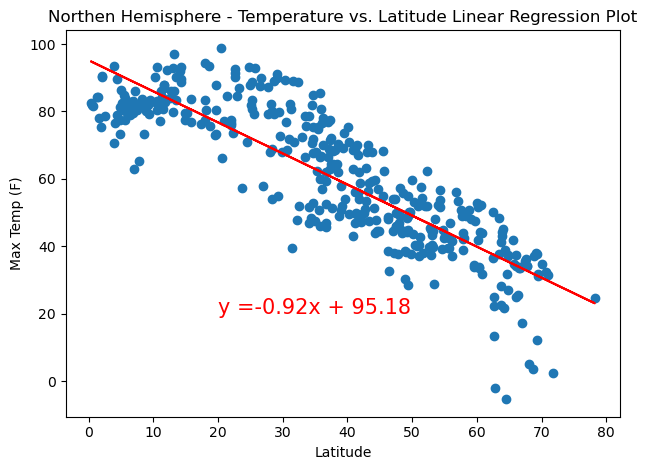

In [15]:
# Linear regression on Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

#Annotate the plot
annotate(equation, 20,20)

# Set a title
plt.title("Northen Hemisphere - Temperature vs. Latitude Linear Regression Plot")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

plt.tight_layout()

# Save the figure
plt.savefig("output_data/Northen Hemisphere - Temperature vs. Latitude Linear Regression Plot.png")

plt.show()

The r-squared is : 0.76


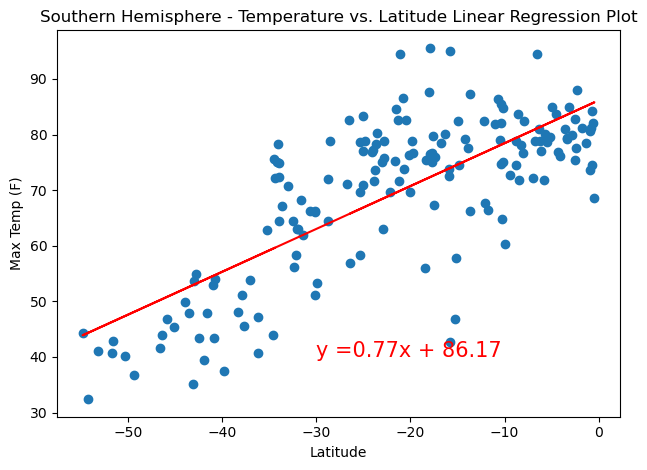

In [16]:
# Linear regression on Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

#Annotate the plot
annotate(equation, -30,40)

# Set a title
plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression Plot")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

plt.tight_layout()

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Temperature vs. Latitude Linear Regression Plot.png")

plt.show()

**Discussion about the linear relationship:** 

Strong negative correlation(-0.87) between latitude and Max Temperature for Northern Hemisphere                                        
Moderate possitive correlation(0.77) between latitude and Max Temperature for Southern Hemisphere 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is : 0.19


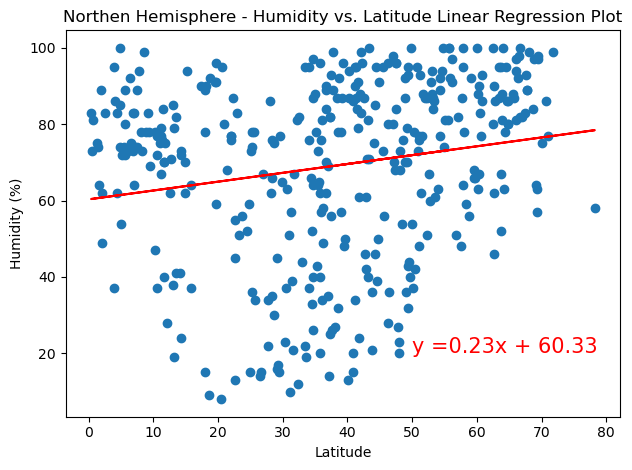

In [17]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

#Annotate the plot
annotate(equation, 50,20)

# Set a title
plt.title("Northen Hemisphere - Humidity vs. Latitude Linear Regression Plot")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

plt.tight_layout()

# Save the figure
plt.savefig("output_data/Northen Hemisphere - Humidity vs. Latitude Linear Regression Plot.png")

plt.show()

The r-squared is : -0.05


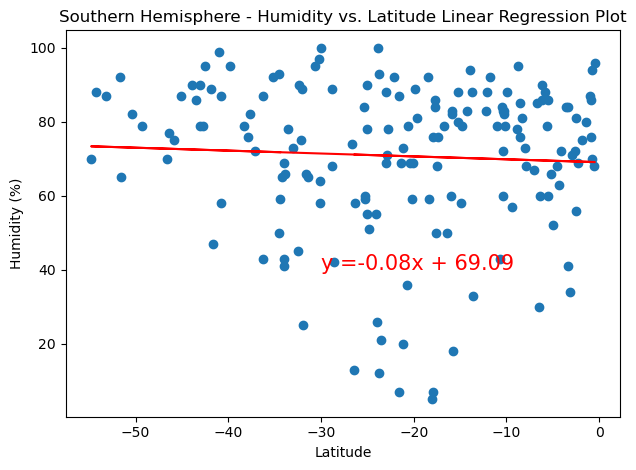

In [18]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

#Annotate the plot
annotate(equation, -30,40)

# Set a title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression Plot")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

plt.tight_layout()

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression Plot.png")

plt.show()

**Discussion about the linear relationship:**                                                                                    
There is a moderate possitive correlation( 0.08) between Latitude and Humidity for Northern Hemisphere                                                                                                                                    

There is a strong negative correlation(-0.02) between Latitude and Humidity for Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : 0.18


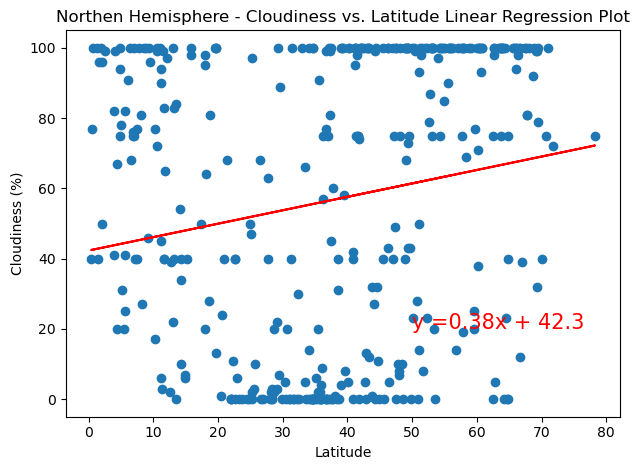

In [19]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

#Annotate the plot
annotate(equation, 50,20)

# Set a title
plt.title("Northen Hemisphere - Cloudiness vs. Latitude Linear Regression Plot")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

plt.tight_layout()

# Save the figure
plt.savefig("output_data/Northen Hemisphere - Cloudiness vs. Latitude Linear Regression Plot.png")


plt.show()

The r-squared is : 0.21


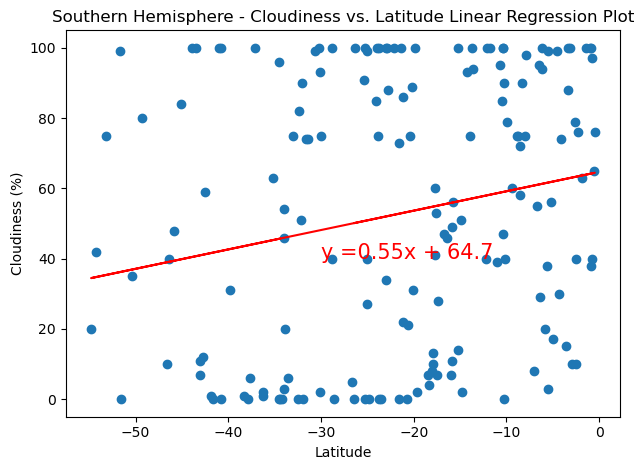

In [20]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

#Annotate the plot
annotate(equation, -30,40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

plt.tight_layout()

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot.png")

plt.show()

**Discussion about the linear relationship:**                                                                                         
Strong possitive corrleation(0.14) between Latitude and Cloudiness for Northern Hemisphere.                                             

Moderate possitive correlation(0.06) between Latitude and Cloudiness for Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : 0.15


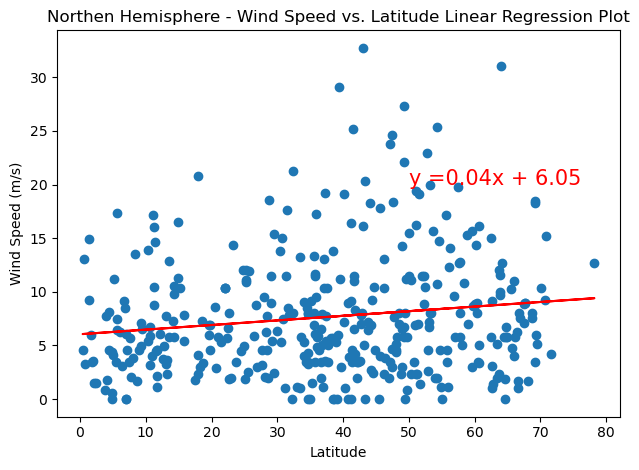

In [21]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

#Annotate the plot
annotate(equation, 50,20)

# Set a title
plt.title("Northen Hemisphere - Wind Speed vs. Latitude Linear Regression Plot")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (m/s)")

plt.tight_layout()

# Save the figure
plt.savefig("output_data/Northen Hemisphere - Wind Speed vs. Latitude Linear Regression Plot.png")

plt.show()

The r-squared is : -0.14


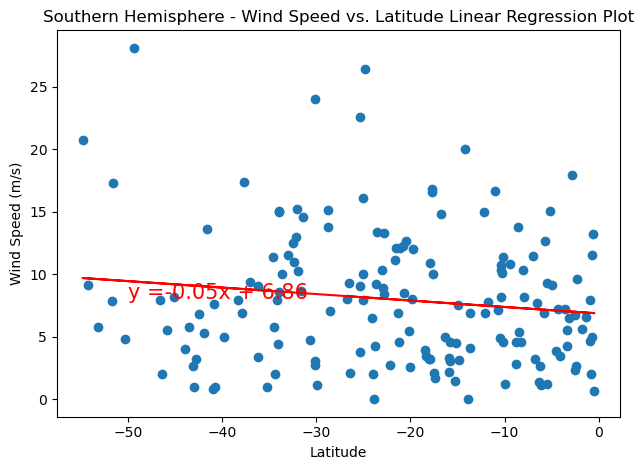

In [22]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

#Annotate the plot
annotate(equation, -50,8)

# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (m/s)")

plt.tight_layout()

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot.png")

plt.show()

**Discussion about the linear relationship:**   

strong Posstive correlation(0.022) between Latitude and Wind Speed for Northern Hemisphere

Weak negative correlation(-0.33) between Latitude and Wind Speed for Southern Hemisphere